In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clin = pd.read_csv('../data/crc_raw/cBioPortal_files/data_clinical_patient.txt', sep='\t', index_col=0)
#drop rows 0-4
clin = clin.iloc[4:]
clin.head()

,Tumor Registry ICD-O-3 Behavior Code,Derived Grade or Differentiation of Tumor,Histology Category,Histology,Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),Stage at Diagnosis,Distant Mets: Adrenal,Distant Mets: Bone,Distant Mets: Brain,...,Number of cancer-directed drug regimens curated,Number of imaging reports,Number of CT scans,Number of MRIs,Number of PET or PET-CT scans,Number of pathology reports,Number of medical oncologist notes curated,Number of Tumor Marker Results,Number of Tumor Marker CA19-9 Results,Number of Tumor Marker CEA Results
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
GENIE-DFCI-000048,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,NaN,Stage II,NaN,NaN,NaN,...,1,3,3,0,0,2,8,3,0,3
GENIE-DFCI-000147,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,NaN,Stage II,NaN,NaN,NaN,...,4,14,8,2,4,5,26,13,1,12
GENIE-DFCI-000233,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",Yes,NaN,Stage III,NaN,NaN,NaN,...,6,34,30,2,1,7,49,39,0,39
GENIE-DFCI-000247,3,I,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,Yes,Stage IV,No,No,No,...,3,10,6,2,2,3,10,0,0,0
GENIE-DFCI-000306,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,Yes,Stage IV,No,No,No,...,5,50,36,13,1,4,38,56,0,56


In [3]:
clin.columns

Index(['Tumor Registry ICD-O-3 Behavior Code',
       'Derived Grade or Differentiation of Tumor', 'Histology Category',
       'Histology',
       'Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis',
       'Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients)',
       'Stage at Diagnosis', 'Distant Mets: Adrenal', 'Distant Mets: Bone',
       'Distant Mets: Brain', 'Distant Mets: Liver', 'Distant Mets: Lung',
       'Distant Mets: Lymph Nodes', 'Distant Mets: Pleura',
       'Distant Mets: Subcutaneous Tissue', 'Distant Mets: Other',
       'Year of Birth', 'Ethnicity Category', 'Primary Race', 'Sex', 'Center ',
       'Number of Cancers, Any Type',
       'Number of BPC Project Cancers (Index Cancers)',
       'Number of cancer-directed drug regimens curated',
       'Number of imaging reports', 'Number of CT scans', 'Number of MRIs',
       'Number of PET or PET-CT scans', 'Number of pathology reports',
       'Number of medi

In [4]:
clin['Derived Grade or Differentiation of Tumor'].value_counts(dropna=False)

Derived Grade or Differentiation of Tumor
II     913
III    275
NaN    194
IV      54
I       50
Name: count, dtype: int64

In [5]:
clin['Derived Grade or Differentiation of Tumor'].fillna('Unknown', inplace=True)

In [6]:
clin['Histology Category'].value_counts()

Histology Category
Adenocarcinoma                   1234
Other histologies/mixed tumor      26
Carcinoma                          11
Squamous cell                       1
Name: count, dtype: int64

In [7]:
clin['Histology'].value_counts()

Histology
Adenocarcinoma, NOS                             958
Mucinous adenocarcinoma                         101
Adenocarcinoma in adenomatous polyp              96
Adenocarcinoma in tubulovillous adenoma          58
Signet ring cell carcinoma                       20
Adenocarcinoma with mixed subtypes                8
Carcinoma, NOS                                    6
Adenocarcinoma in villous adenoma                 5
Composite carcinoid                               3
Medullary carcinoma, NOS                          3
Adenosquamous carcinoma                           2
Papillary adenocarcinoma, NOS                     2
Mucin-producing adenocarcinoma                    2
Neuroendocrine carcinoma                          1
Tubular adenocarcinoma                            1
Large cell neuroendocrine carcinoma               1
Sq. cell carcinoma, keratinizing, NOS             1
Adenocarcinoma with neuroendocrine differen.      1
Neoplasm, malignant                               1
Ad

In [8]:
keep_cols = ['Tumor Registry ICD-O-3 Behavior Code',
       'Derived Grade or Differentiation of Tumor', 'Histology Category',
       'Histology',
       'Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis',
       'Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients)',
       'Stage at Diagnosis', 
       'Year of Birth', 'Ethnicity Category', 'Primary Race', 'Sex', 'Center ',]

In [9]:
clin = clin[keep_cols]
clin.shape

(1486, 12)

In [10]:
clin.head()

,Tumor Registry ICD-O-3 Behavior Code,Derived Grade or Differentiation of Tumor,Histology Category,Histology,Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),Stage at Diagnosis,Year of Birth,Ethnicity Category,Primary Race,Sex,Center
#Patient Identifier,,,,,,,,,,,,
GENIE-DFCI-000048,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,NaN,Stage II,1955,Non-Spanish; non-Hispanic,White,Male,DFCI
GENIE-DFCI-000147,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,NaN,Stage II,1964,Non-Spanish; non-Hispanic,White,Female,DFCI
GENIE-DFCI-000233,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",Yes,NaN,Stage III,1959,Non-Spanish; non-Hispanic,White,Female,DFCI
GENIE-DFCI-000247,3,I,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,Yes,Stage IV,1951,Non-Spanish; non-Hispanic,White,Female,DFCI
GENIE-DFCI-000306,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",NaN,Yes,Stage IV,1956,Non-Spanish; non-Hispanic,White,Female,DFCI


In [11]:
clin['Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis'] = clin['Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis'].fillna('No')

In [12]:
clin.rename(columns={'Center ': 'Center'}, inplace=True)
clin['Center'].value_counts()

Center
MSK     697
DFCI    564
VICC    225
Name: count, dtype: int64

In [13]:
clin['Histology Category'].value_counts()

Histology Category
Adenocarcinoma                   1234
Other histologies/mixed tumor      26
Carcinoma                          11
Squamous cell                       1
Name: count, dtype: int64

In [14]:
clin['Histology'].value_counts()

Histology
Adenocarcinoma, NOS                             958
Mucinous adenocarcinoma                         101
Adenocarcinoma in adenomatous polyp              96
Adenocarcinoma in tubulovillous adenoma          58
Signet ring cell carcinoma                       20
Adenocarcinoma with mixed subtypes                8
Carcinoma, NOS                                    6
Adenocarcinoma in villous adenoma                 5
Composite carcinoid                               3
Medullary carcinoma, NOS                          3
Adenosquamous carcinoma                           2
Papillary adenocarcinoma, NOS                     2
Mucin-producing adenocarcinoma                    2
Neuroendocrine carcinoma                          1
Tubular adenocarcinoma                            1
Large cell neuroendocrine carcinoma               1
Sq. cell carcinoma, keratinizing, NOS             1
Adenocarcinoma with neuroendocrine differen.      1
Neoplasm, malignant                               1
Ad

In [15]:
clin.loc[clin['Histology'].str.contains('Mucin', case=False, na=False), 'Histology'] = 'Mucinous'
clin.loc[clin['Histology'].str.contains('tubulov', case=False, na=False), 'Histology'] = 'TubulovillousVillous'
clin.loc[clin['Histology'].str.contains('villous', case=False, na=False), 'Histology'] = 'TubulovillousVillous'
clin.loc[clin['Histology'].str.contains('signet ring', case=False, na=False), 'Histology'] = 'Signet Ring'
clin.loc[clin['Histology'].str.contains('squamous', case=False, na=False), 'Histology'] = 'Adenosquamous'
clin.loc[clin['Histology'].str.contains('Sq.', case=False, na=False), 'Histology'] = 'Adenosquamous'
clin.loc[clin['Histology'].str.contains('Neuroendo', case=False, na=False), 'Histology'] = 'Neuroendocrine'
clin.loc[clin['Histology'].str.contains('Carcinoid', case=False, na=False), 'Histology'] = 'Neuroendocrine'
clin.loc[clin['Histology'].str.contains('Mixed', case=False, na=False), 'Histology'] = 'Mixed'
clin.loc[clin['Histology'].str.contains('Medullary', case=False, na=False), 'Histology'] = 'Medullary'
clin['Histology'].value_counts()


Histology
Adenocarcinoma, NOS                           958
Mucinous                                      103
Adenocarcinoma in adenomatous polyp            96
TubulovillousVillous                           63
Signet Ring                                    20
Mixed                                           8
Neuroendocrine                                  6
Carcinoma, NOS                                  6
Medullary                                       3
Adenosquamous                                   3
Papillary adenocarcinoma, NOS                   2
Adenocarcinoma in mult. adenomatous polyps      1
Neoplasm, malignant                             1
Tubular adenocarcinoma                          1
Adenocarcinoma in adenoma. polyposis coli       1
Name: count, dtype: int64

In [16]:
#if value count is less than 20, replace with 'Other'
histo_vals = clin['Histology'].value_counts()
histo_vals[histo_vals < 20]
other_list = list(histo_vals[histo_vals < 20].index)
for i in other_list:
    clin.loc[clin['Histology'] == i, 'Histology'] = 'Other'
clin['Histology'].value_counts()

Histology
Adenocarcinoma, NOS                    958
Mucinous                               103
Adenocarcinoma in adenomatous polyp     96
TubulovillousVillous                    63
Other                                   32
Signet Ring                             20
Name: count, dtype: int64

In [17]:
#if value count is less than 20, replace with 'Other'
histo_vals = clin['Primary Race'].value_counts()
histo_vals[histo_vals < 20]
other_list = list(histo_vals[histo_vals < 20].index)
for i in other_list:
    clin.loc[clin['Primary Race'] == i, 'Primary Race'] = 'Other'
clin['Primary Race'].value_counts()

Primary Race
White      1214
Black       100
Chinese      71
Unknown      70
Other        31
Name: count, dtype: int64

In [18]:
#find columns with missing values
clin.isnull().sum()

Tumor Registry ICD-O-3 Behavior Code                                               214
Derived Grade or Differentiation of Tumor                                            0
Histology Category                                                                 214
Histology                                                                          214
Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis      0
Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients)    784
Stage at Diagnosis                                                                   1
Year of Birth                                                                        0
Ethnicity Category                                                                   0
Primary Race                                                                         0
Sex                                                                                  0
Center                                     

In [19]:
clin['Tumor Registry ICD-O-3 Behavior Code'].fillna('Unknown', inplace=True)
clin['Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients)'].fillna('NA', inplace=True)
clin['Histology Category'].fillna('NA', inplace=True)
clin['Histology'].fillna('NA', inplace=True)
clin.dropna(subset=['Stage at Diagnosis'], inplace=True)

In [20]:
#find columns with missing values
clin.isnull().sum()

Tumor Registry ICD-O-3 Behavior Code                                               0
Derived Grade or Differentiation of Tumor                                          0
Histology Category                                                                 0
Histology                                                                          0
Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis    0
Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients)    0
Stage at Diagnosis                                                                 0
Year of Birth                                                                      0
Ethnicity Category                                                                 0
Primary Race                                                                       0
Sex                                                                                0
Center                                                           

In [21]:
surv = pd.read_csv('../data/crc_raw/cBioPortal_files/data_clinical_supp_survival.txt', sep='\t', index_col=0)
#drop rows 0-4
surv = surv.iloc[6:]
surv

,PFS-I from Diagnosis Status,Months from Diagnosis,PFS-M from Diagnosis Status,Months from Diagnosis.1,OS from Diagnosis Status,Months from Diagnosis.2
#Patient Identifier,,,,,,
GENIE-DFCI-000147,1:DECEASED,8.28947368421053,1:DECEASED,0.625,1:DECEASED,40.625
GENIE-DFCI-000233,1:DECEASED,53.6842105263158,1:DECEASED,34.6381578947368,1:DECEASED,108.651315789474
GENIE-DFCI-000247,1:DECEASED,14.6381578947368,1:DECEASED,14.4407894736842,1:DECEASED,38.2565789473684
GENIE-DFCI-000306,1:DECEASED,10.5921052631579,1:DECEASED,0.888157894736842,1:DECEASED,40.4605263157895
GENIE-DFCI-000311,1:DECEASED,0.493421052631579,0:LIVING,3.09210526315789,0:LIVING,58.3223684210526
...,...,...,...,...,...,...
GENIE-VICC-989853,1:DECEASED,7.23684210526316,1:DECEASED,0.460526315789474,1:DECEASED,23.4210526315789
GENIE-VICC-993800,1:DECEASED,0.493421052631579,1:DECEASED,0.493421052631579,1:DECEASED,0.493421052631579
GENIE-VICC-994755,1:DECEASED,0.625,1:DECEASED,6.77631578947368,1:DECEASED,12.2697368421053


In [22]:
pd.crosstab(surv['PFS-I from Diagnosis Status'], surv['PFS-M from Diagnosis Status'], dropna=False)

PFS-M from Diagnosis Status,0:LIVING,1:DECEASED
PFS-I from Diagnosis Status,,
0:LIVING,125,37
1:DECEASED,70,1052


In [23]:
#if PFS-I or PFS-M is 0:LIVING, then 'out_pfs' = 1
surv['out_pfs'] = 0
surv.loc[(surv['PFS-I from Diagnosis Status'] == '0:LIVING') | (surv['PFS-M from Diagnosis Status'] == '0:LIVING'), 'out_pfs'] = 1
surv['out_pfs'].value_counts()

out_pfs
0    1254
1     232
Name: count, dtype: int64

In [24]:
#if OS is 0:LIVING, then 'out_os' = 1
surv['out_os'] = 0
surv.loc[surv['OS from Diagnosis Status'] == '0:LIVING', 'out_os'] = 1
surv['out_os'].value_counts()

out_os
1    794
0    692
Name: count, dtype: int64

In [25]:
surv['OS from Diagnosis Status'].value_counts()

OS from Diagnosis Status
0:LIVING      794
1:DECEASED    692
Name: count, dtype: int64

In [26]:
#add the 'clin_' prefix to all columns in clin
clin.columns = ['clin_' + i for i in clin.columns]

In [27]:
#check clin index for duplicates
clin.index.value_counts()

#Patient Identifier
GENIE-DFCI-000048      1
GENIE-MSK-P-0017263    1
GENIE-MSK-P-0017766    1
GENIE-MSK-P-0017621    1
GENIE-MSK-P-0017589    1
                      ..
GENIE-DFCI-095705      1
GENIE-DFCI-095561      1
GENIE-DFCI-095427      1
GENIE-DFCI-095111      1
GENIE-VICC-996370      1
Name: count, Length: 1485, dtype: int64

In [28]:
#drop duplicates in surv index
surv = surv[~surv.index.duplicated(keep='first')]

In [29]:
clin['out_pfs'] = np.NaN
clin['out_os'] = np.NaN
clin.update(surv[['out_pfs', 'out_os']])
clin.head()

,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,clin_Sex,clin_Center,out_pfs,out_os
#Patient Identifier,,,,,,,,,,,,,,
GENIE-DFCI-000048,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage II,1955,Non-Spanish; non-Hispanic,White,Male,DFCI,NaN,NaN
GENIE-DFCI-000147,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage II,1964,Non-Spanish; non-Hispanic,White,Female,DFCI,0.0,0.0
GENIE-DFCI-000233,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",Yes,NA,Stage III,1959,Non-Spanish; non-Hispanic,White,Female,DFCI,0.0,0.0
GENIE-DFCI-000247,3,I,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1951,Non-Spanish; non-Hispanic,White,Female,DFCI,0.0,0.0
GENIE-DFCI-000306,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1956,Non-Spanish; non-Hispanic,White,Female,DFCI,0.0,0.0


In [30]:
clin.loc[clin['clin_Center'] == 'MSK']

,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,clin_Sex,clin_Center,out_pfs,out_os
#Patient Identifier,,,,,,,,,,,,,,
GENIE-MSK-P-0000739,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1935,Non-Spanish; non-Hispanic,White,Male,MSK,0.0,0.0
GENIE-MSK-P-0001500,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1959,Non-Spanish; non-Hispanic,White,Female,MSK,0.0,0.0
GENIE-MSK-P-0001640,3,II,Adenocarcinoma,TubulovillousVillous,No,NA,Stage III,1953,Non-Spanish; non-Hispanic,White,Male,MSK,0.0,1.0
GENIE-MSK-P-0001961,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1946,Non-Spanish; non-Hispanic,White,Female,MSK,0.0,0.0
GENIE-MSK-P-0002463,3,III,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1955,Non-Spanish; non-Hispanic,White,Female,MSK,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GENIE-MSK-P-0025986,3,III,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1947,Mexican (includes Chicano),White,Female,MSK,0.0,0.0
GENIE-MSK-P-0026011,3,II,Adenocarcinoma,TubulovillousVillous,No,Yes,Stage IV,1960,Non-Spanish; non-Hispanic,White,Female,MSK,0.0,1.0
GENIE-MSK-P-0026038,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1980,Non-Spanish; non-Hispanic,Chinese,Female,MSK,0.0,1.0


In [31]:
#drop rows with missing out_pfs and out_os
clin = clin.dropna(subset=['out_pfs', 'out_os'])

In [32]:
cna = pd.read_csv('../data/crc_raw/cBioPortal_files/data_CNA.txt', sep='\t', index_col=0)

#keep only rows with no missing values
print(cna.shape)
cna = cna.dropna(axis=0, how='any')
print(cna.shape)
cna = cna.T
#rename the index to #Patient Identifier
cna.index.name = '#Patient Identifier'

(965, 1487)
(231, 1487)


In [33]:
cna.index[0].replace(cna.index[0].split('-')[-1], '')[:-1]


'GENIE-DFCI-002643'

In [34]:
#drop the string in the index after the last hyphen
cna.index = [i.replace(i.split('-')[-1], '')[:-1] for i in cna.index]
cna.head()

Hugo_Symbol,ABL1,AKT1,AKT2,AKT3,ALK,ALOX12B,APC,AR,ARAF,ARID1B,...,TP53,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,WT1,XPO1,ZRSR2
GENIE-DFCI-002643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-008624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-003423,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-007675,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
GENIE-DFCI-008889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
cna.tail()

Hugo_Symbol,ABL1,AKT1,AKT2,AKT3,ALK,ALOX12B,APC,AR,ARAF,ARID1B,...,TP53,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,WT1,XPO1,ZRSR2
GENIE-VICC-24847-unk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-VICC-66963-unk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
GENIE-VICC-85466-unk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-VICC-354847-unk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-VICC-43079-unk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
cna_msk = cna.loc[cna.index.str.contains('MSK', case=False)]
cna_vicc = cna.loc[cna.index.str.contains('VICC', case=False)]
cna_dfci = cna.loc[cna.index.str.contains('DFCI', case=False)]

In [37]:
cna_msk.index

Index(['GENIE-MSK-P-0024260-T01', 'GENIE-MSK-P-0022090-T01',
       'GENIE-MSK-P-0015647-T01', 'GENIE-MSK-P-0019711-T01',
       'GENIE-MSK-P-0013941-T01', 'GENIE-MSK-P-0011287-T01',
       'GENIE-MSK-P-0021537-T01', 'GENIE-MSK-P-0007090-T02',
       'GENIE-MSK-P-0010680-T02', 'GENIE-MSK-P-0022171-T01',
       ...
       'GENIE-MSK-P-0011563-T01', 'GENIE-MSK-P-0004441-T01',
       'GENIE-MSK-P-0020838-T01', 'GENIE-MSK-P-0009157-T01',
       'GENIE-MSK-P-0019487-T01', 'GENIE-MSK-P-0004494-T01',
       'GENIE-MSK-P-0016767-T01', 'GENIE-MSK-P-0013227-T01',
       'GENIE-MSK-P-0022945-T01', 'GENIE-MSK-P-0012389-T01'],
      dtype='object', length=735)

In [38]:
cna_vicc.index

Index(['GENIE-VICC-65070-unk', 'GENIE-VICC-229859-unk',
       'GENIE-VICC-845967-unk', 'GENIE-VICC-242063-unk',
       'GENIE-VICC-899430-unk', 'GENIE-VICC-78599-unk', 'GENIE-VICC-84568-unk',
       'GENIE-VICC-647576-unk', 'GENIE-VICC-784009-unk',
       'GENIE-VICC-389872-unk',
       ...
       'GENIE-VICC-07627-unk', 'GENIE-VICC-48486-unk', 'GENIE-VICC-27509-unk',
       'GENIE-VICC-279076-unk', 'GENIE-VICC-382607-unk',
       'GENIE-VICC-24847-unk', 'GENIE-VICC-66963-unk', 'GENIE-VICC-85466-unk',
       'GENIE-VICC-354847-unk', 'GENIE-VICC-43079-unk'],
      dtype='object', length=181)

In [39]:
cna_msk.index = [i.replace('-T01', '') for i in cna_msk.index]
cna_msk.index = [i.replace('-T02', '') for i in cna_msk.index]
cna_msk.index = [i.replace('-T03', '') for i in cna_msk.index]
cna_msk.index = [i.replace('-T04', '') for i in cna_msk.index]
cna_vicc.index = [i.replace('-unk', '') for i in cna_vicc.index]

In [40]:
#put them back together
cna = pd.concat([cna_msk, cna_vicc, cna_dfci])
cna.shape

(1487, 231)

In [41]:
#check for duplicates
cna.index.value_counts()
#drop duplicates
print(cna.shape)
cna = cna[~cna.index.duplicated(keep='first')]
print(cna.shape)

(1487, 231)
(1442, 231)


In [42]:
clin.shape

(1484, 14)

In [43]:
cna_pts = set(cna.index)
clin_pts = set(clin.index)
len(cna_pts.intersection(clin_pts))

1357

In [44]:
#find pts in cna but not in clin
cna_pts.difference(clin_pts)

{'GENIE-DFCI-0',
 'GENIE-DFCI-000048',
 'GENIE-MSK-P-0010555',
 'GENIE-VICC-00745',
 'GENIE-VICC-0420',
 'GENIE-VICC-0462',
 'GENIE-VICC-07627',
 'GENIE-VICC-1341',
 'GENIE-VICC-20603',
 'GENIE-VICC-2208',
 'GENIE-VICC-22503',
 'GENIE-VICC-2256',
 'GENIE-VICC-2344',
 'GENIE-VICC-24847',
 'GENIE-VICC-27490',
 'GENIE-VICC-27509',
 'GENIE-VICC-27744',
 'GENIE-VICC-27849',
 'GENIE-VICC-29029',
 'GENIE-VICC-30869',
 'GENIE-VICC-30883',
 'GENIE-VICC-32564',
 'GENIE-VICC-32793',
 'GENIE-VICC-32962',
 'GENIE-VICC-33273',
 'GENIE-VICC-34885',
 'GENIE-VICC-3542',
 'GENIE-VICC-37065',
 'GENIE-VICC-3749',
 'GENIE-VICC-37882',
 'GENIE-VICC-38079',
 'GENIE-VICC-38389',
 'GENIE-VICC-39604',
 'GENIE-VICC-39709',
 'GENIE-VICC-40089',
 'GENIE-VICC-4016',
 'GENIE-VICC-43079',
 'GENIE-VICC-43859',
 'GENIE-VICC-4482',
 'GENIE-VICC-44830',
 'GENIE-VICC-4640',
 'GENIE-VICC-46663',
 'GENIE-VICC-47885',
 'GENIE-VICC-4840',
 'GENIE-VICC-48486',
 'GENIE-VICC-4872',
 'GENIE-VICC-49767',
 'GENIE-VICC-5375',
 'GENI

In [45]:
#find index in cna with str '7627'
cna[cna.index.str.contains('00048')]

Hugo_Symbol,ABL1,AKT1,AKT2,AKT3,ALK,ALOX12B,APC,AR,ARAF,ARID1B,...,TP53,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,WT1,XPO1,ZRSR2
GENIE-MSK-P-0004886,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-MSK-P-0004803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-MSK-P-0004845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-000048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#find index in clin with str '7627'
clin[clin.index.str.contains('1341')]

,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,clin_Sex,clin_Center,out_pfs,out_os
#Patient Identifier,,,,,,,,,,,,,,


In [47]:
#find index in clin with str '7627'
clin[clin.index.str.contains('34885')]

,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,clin_Sex,clin_Center,out_pfs,out_os
#Patient Identifier,,,,,,,,,,,,,,


In [48]:
overlap = []
for i in clin_pts:
    if i in cna_pts:
        overlap.append(i)
len(overlap)

1357

In [49]:
clin_overlap = clin.loc[overlap]
clin_overlap['clin_Center'].value_counts()

clin_Center
MSK     696
DFCI    562
VICC     99
Name: count, dtype: int64

In [50]:
cna_overlap = cna.loc[overlap]
cna_overlap.shape

(1357, 231)

In [51]:
#add the 'cna_' prefix to all columns in cna
cna_overlap.columns = ['cna_' + i for i in cna_overlap.columns]
#concatenate clin and cna
data = pd.concat([clin_overlap, cna_overlap], axis=1)
data.shape

(1357, 245)

In [52]:
data.head()

,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,...,cna_TP53,cna_TSC1,cna_TSC2,cna_TSHR,cna_U2AF1,cna_VEGFA,cna_VHL,cna_WT1,cna_XPO1,cna_ZRSR2
GENIE-MSK-P-0012419,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1969,Non-Spanish; non-Hispanic,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-028474,Unknown,II,NA,NA,No,Yes,Stage IV,1955,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-091506,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage II,1946,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-000998,Unknown,II,NA,NA,No,NA,Stage II,1938,Non-Spanish; non-Hispanic,White,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-MSK-P-0015647,3,III,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage III,1961,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
mut = pd.read_csv('../data/crc_raw/cBioPortal_files/data_mutations_extended.txt', sep='\t')

[barcode for barcode in mut['Tumor_Sample_Barcode'] if 'MSK' in barcode][0:5]


/tmp/ipykernel_236048/584708035.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  mut = pd.read_csv('../data/crc_raw/cBioPortal_files/data_mutations_extended.txt', sep='\t')


['GENIE-MSK-P-0005327-T01-IM5',
 'GENIE-MSK-P-0021090-T01-IM6',
 'GENIE-MSK-P-0019785-T01-IM6',
 'GENIE-MSK-P-0015244-T01-IM6',
 'GENIE-MSK-P-0017016-T01-IM6']

In [54]:
import re
mut_dfci = mut.loc[mut['Tumor_Sample_Barcode'].str.contains('DFCI', case=False)]
mut_vicc = mut.loc[mut['Tumor_Sample_Barcode'].str.contains('VICC', case=False)]
mut_msk = mut.loc[mut['Tumor_Sample_Barcode'].str.contains('MSK', case=False)]
mut_dfci['patient_id'] = [i.replace(i.split('-')[-1], '')[:-1] for i in mut_dfci['Tumor_Sample_Barcode']]
#for vicc replace -unk-(any number) with ''
mut_vicc['patient_id'] = [re.sub(r'-unk-\d+', '', i) for i in mut_vicc['Tumor_Sample_Barcode']]
#for msk replace -T0(any number) with ''
mut_msk['patient_id'] = [re.sub(r'-T0\d+', '', i) for i in mut_msk['Tumor_Sample_Barcode']]
mut_msk['patient_id'] = [re.sub(r'-IM\d+', '', i) for i in mut_msk['patient_id']]
#put them back together
mut = pd.concat([mut_dfci, mut_vicc, mut_msk])

/tmp/ipykernel_236048/96564927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut_dfci['patient_id'] = [i.replace(i.split('-')[-1], '')[:-1] for i in mut_dfci['Tumor_Sample_Barcode']]
/tmp/ipykernel_236048/96564927.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut_vicc['patient_id'] = [re.sub(r'-unk-\d+', '', i) for i in mut_vicc['Tumor_Sample_Barcode']]
/tmp/ipykernel_236048/96564927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [55]:
[barcode for barcode in mut['patient_id'] if 'MSK' in barcode][0:5]

['GENIE-MSK-P-0005327',
 'GENIE-MSK-P-0021090',
 'GENIE-MSK-P-0019785',
 'GENIE-MSK-P-0015244',
 'GENIE-MSK-P-0017016']

In [56]:
#for each patient_id, there may be multiple tumor_sample_barcode. We want to keep only the first one
samp1 = mut[mut['patient_id'] == 'GENIE-DFCI-002643']
samp1['Tumor_Sample_Barcode'].nunique()

1

In [57]:
pt_samp_dict = {}
for i in mut['patient_id'].unique():
    pt_samp_dict[i] = mut[mut['patient_id'] == i]['Tumor_Sample_Barcode'].unique()[0]
len(pt_samp_dict)
#get a list of Tumor_Sample_Barcode to keep
samp_to_keep = list(pt_samp_dict.values())

In [58]:
#filter mut to keep only the samples in samp_to_keep
print(mut.shape)
mut = mut[mut['Tumor_Sample_Barcode'].isin(samp_to_keep)]
print(mut.shape)

(23225, 65)
(22714, 65)


In [59]:
mut_df = pd.DataFrame(columns=[mut['Hugo_Symbol'].unique()], index=mut['patient_id'].unique())

In [60]:
#for each row in mut, make the value for the corresponding row/column in mut_df 1
for i in mut.index:
    mut_df.loc[mut.loc[i, 'patient_id'], mut.loc[i, 'Hugo_Symbol']] = 1

In [61]:
mut_df.head()

,PALB2,FBXW7,EGFR,PSMD13,KRAS,CDKN2A,CBLB,PARK2,CBL,CREBBP,...,HIST3H3,CYSLTR2,SESN2,PDPK1,SESN3,RYBP,H3F3B,HIST1H3G,PTP4A1,SETD8
GENIE-DFCI-002643,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENIE-DFCI-008624,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENIE-DFCI-003423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENIE-DFCI-007675,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENIE-DFCI-008889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
mut_df.shape

(1470, 723)

In [63]:
mut_df_copy = mut_df.T.copy()
mut_df_copy.head()


,GENIE-DFCI-002643,GENIE-DFCI-008624,GENIE-DFCI-003423,GENIE-DFCI-007675,GENIE-DFCI-008889,GENIE-DFCI-004251,GENIE-DFCI-008840,GENIE-DFCI-008622,GENIE-DFCI-006859,GENIE-DFCI-008759,...,GENIE-MSK-P-0010180,GENIE-MSK-P-0024383,GENIE-MSK-P-0008913,GENIE-MSK-P-0002994,GENIE-MSK-P-0017621,GENIE-MSK-P-0013856,GENIE-MSK-P-0009121,GENIE-MSK-P-0015149,GENIE-MSK-P-0012651,GENIE-MSK-P-0012340
PALB2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FBXW7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGFR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PSMD13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KRAS,1,1,NaN,1,NaN,1,NaN,1,1,1,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [64]:
mut_df_copy['prop_muts'] = mut_df_copy.sum(axis=1)/mut_df_copy.shape[1]
mut_df_copy.head()

,GENIE-DFCI-002643,GENIE-DFCI-008624,GENIE-DFCI-003423,GENIE-DFCI-007675,GENIE-DFCI-008889,GENIE-DFCI-004251,GENIE-DFCI-008840,GENIE-DFCI-008622,GENIE-DFCI-006859,GENIE-DFCI-008759,...,GENIE-MSK-P-0024383,GENIE-MSK-P-0008913,GENIE-MSK-P-0002994,GENIE-MSK-P-0017621,GENIE-MSK-P-0013856,GENIE-MSK-P-0009121,GENIE-MSK-P-0015149,GENIE-MSK-P-0012651,GENIE-MSK-P-0012340,prop_muts
PALB2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034694
FBXW7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.136054
EGFR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032653
PSMD13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002721
KRAS,1,1,NaN,1,NaN,1,NaN,1,1,1,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0.440136


<Axes: >

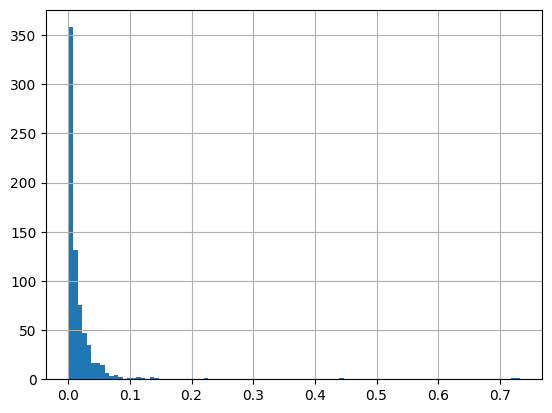

In [65]:
mut_df_copy['prop_muts'].hist(bins=100)

<Axes: >

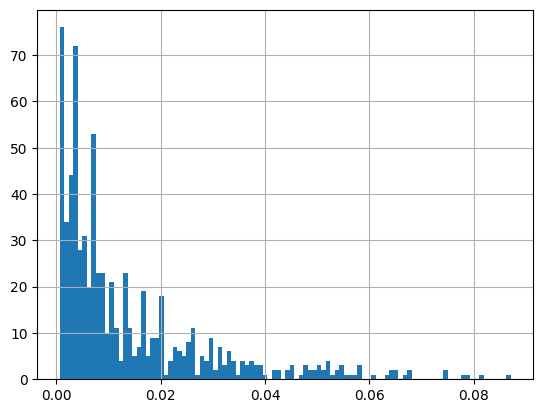

In [66]:
#look at only the distribution from 0.0 to 0.1
mut_df_copy['prop_muts'][mut_df_copy['prop_muts'] <= 0.1].hist(bins=100)

In [67]:
#we want to keep only the genes that are mutated in at least 1% of the patients
mut_df_copy = mut_df_copy[mut_df_copy['prop_muts'] >= 0.01]
keep_genes = list(mut_df_copy.index)
len(keep_genes)

309

In [68]:
mut_df = mut_df[keep_genes]
mut_df.shape

(1470, 309)

In [69]:
mut_df.fillna(0, inplace=True)

In [70]:
mut_df.head()

,PALB2,FBXW7,EGFR,KRAS,CDKN2A,PARK2,CBL,CREBBP,TP53,SMAD4,...,ASXL2,ARID5B,DNMT3B,MST1R,INPPL1,MSH3,HLA-B,RPS6KA4,TP63,LATS2
GENIE-DFCI-002643,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-008624,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-003423,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-007675,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-DFCI-008889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
mut_df['PALB2'].value_counts(dropna=False)

(PALB2,)
0           1419
1             51
Name: count, dtype: int64

In [72]:
#for each column in mut_df, if the column name is a tuple, keep only the first element
mut_df.columns = [i[0] if type(i) == tuple else i for i in mut_df.columns]
#add the 'mut_' prefix to all columns in mut_df
mut_df.columns = ['mut_' + i for i in mut_df.columns]

In [73]:
mut_df.tail()

,mut_PALB2,mut_FBXW7,mut_EGFR,mut_KRAS,mut_CDKN2A,mut_PARK2,mut_CBL,mut_CREBBP,mut_TP53,mut_SMAD4,...,mut_ASXL2,mut_ARID5B,mut_DNMT3B,mut_MST1R,mut_INPPL1,mut_MSH3,mut_HLA-B,mut_RPS6KA4,mut_TP63,mut_LATS2
GENIE-MSK-P-0013856,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-MSK-P-0009121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-MSK-P-0015149,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-MSK-P-0012651,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GENIE-MSK-P-0012340,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#concatenate data and mut_df
data = pd.concat([data, mut_df], axis=1)
print(data.shape)
data.head()

(1474, 554)


,clin_Tumor Registry ICD-O-3 Behavior Code,clin_Derived Grade or Differentiation of Tumor,clin_Histology Category,clin_Histology,clin_Neoadjuvant Chemotherapy or Radiation Therapy Before Pathologic Stage Diagnosis,clin_Sites of Distant Metastasis at the Time of Cancer Diagnosis (Stage IV Patients),clin_Stage at Diagnosis,clin_Year of Birth,clin_Ethnicity Category,clin_Primary Race,...,mut_ASXL2,mut_ARID5B,mut_DNMT3B,mut_MST1R,mut_INPPL1,mut_MSH3,mut_HLA-B,mut_RPS6KA4,mut_TP63,mut_LATS2
GENIE-MSK-P-0012419,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,Yes,Stage IV,1969,Non-Spanish; non-Hispanic,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-028474,Unknown,II,NA,NA,No,Yes,Stage IV,1955,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-091506,3,II,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage II,1946,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-DFCI-000998,Unknown,II,NA,NA,No,NA,Stage II,1938,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GENIE-MSK-P-0015647,3,III,Adenocarcinoma,"Adenocarcinoma, NOS",No,NA,Stage III,1961,Non-Spanish; non-Hispanic,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
data['mut_PALB2'].value_counts(dropna=False)

mut_PALB2
0.0    1419
1.0      51
NaN       4
Name: count, dtype: int64

In [76]:
data.dropna(subset=['mut_PALB2'], inplace=True)

In [77]:
#keep only rows where out_os is not null
print(data.shape)
data = data[~data['out_os'].isnull()]
print(data.shape)

(1470, 554)
(1353, 554)


In [78]:
lab = pd.read_csv('../data/crc_raw/cBioPortal_files/data_timeline_labtest.txt', sep='\t')
lab = lab[lab['TEST'] == 'CEA']
lab.drop_duplicates(subset=['PATIENT_ID'], inplace=True)
lab.head()

,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,TEST,RESULT,TM_NUMBER,TM_RESULT_UNITS,TM_NORMAL_RANGE_UPPER
0,GENIE-DFCI-000048,23,NaN,LAB_TEST,CEA,0.0,1,ng/mL,2.5
3,GENIE-DFCI-000147,464,NaN,LAB_TEST,CEA,2.8,1,ng/mL,2.5
16,GENIE-DFCI-000233,1193,NaN,LAB_TEST,CEA,1.0,1,ng/mL,2.5
55,GENIE-DFCI-000306,15,NaN,LAB_TEST,CEA,0.7,1,ng/mL,NaN
111,GENIE-DFCI-000311,38,NaN,LAB_TEST,CEA,0.0,1,ng/mL,2.5


In [83]:
i = 'GENIE-DFCI-000147'
lab[lab['PATIENT_ID'] == i]['RESULT'].values[0]


2.8

In [ ]:
data.loc[i, 'clin_CEA'] = lab[lab['PATIENT_ID'] == i]['RESULT'].values[0]

In [80]:
data.loc[i, 'clin_CEA']

2.8

In [84]:
data['clin_CEA'] = np.NaN
for i in data.index:
    try:
        data.loc[i, 'clin_CEA'] = lab[lab['PATIENT_ID'] == i]['RESULT'].values[0]
    except:
        pass
data['clin_CEA'].notnull().sum()

1149

<Axes: >

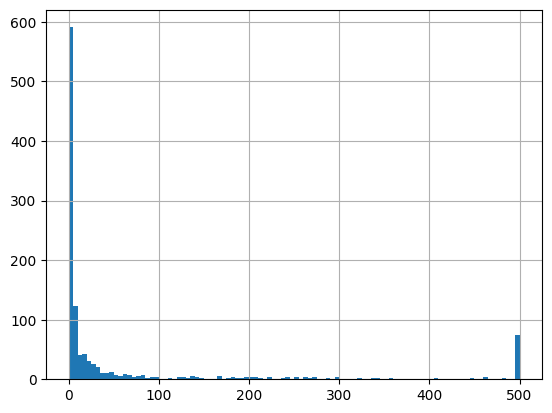

In [86]:
data.loc[data['clin_CEA'] > 500, 'clin_CEA'] = 500
data['clin_CEA'].hist(bins=100)

In [87]:
data['clin_CEA_cat'] = np.NaN
data.loc[data['clin_CEA'] <= 5, 'clin_CEA_cat'] = -1
data.loc[data['clin_CEA'] > 5, 'clin_CEA_cat'] = 1
data['clin_CEA_cat'].value_counts(dropna=False)

/tmp/ipykernel_236048/3849762762.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['clin_CEA_cat'] = np.NaN


clin_CEA_cat
-1.0    595
 1.0    554
 NaN    204
Name: count, dtype: int64

In [88]:
data['clin_CEA'].fillna(0, inplace=True)
data['clin_CEA_cat'].fillna(0, inplace=True)
data['clin_CEA_cat'].value_counts(dropna=False)

clin_CEA_cat
-1.0    595
 1.0    554
 0.0    204
Name: count, dtype: int64

In [89]:
#find columns with null values
data.columns[data.isnull().any()].tolist()

[]

In [90]:
data.to_csv('../data/crc_combined.csv', index=False)

In [91]:
data_mut = data[[i for i in data.columns if 'mut_' in i]]
data_clin = data[[i for i in data.columns if 'clin_' in i]]
data_cna = data[[i for i in data.columns if 'cna_' in i]]
data_out = data[[i for i in data.columns if 'out_' in i]]
print(data_mut.shape, data_clin.shape, data_cna.shape, data_out.shape)

(1353, 309) (1353, 14) (1353, 231) (1353, 2)


In [92]:
#save data_mut, data_clin, data_cna, data_out
data_mut.to_csv('../data/crc_mut.csv', index=False)
data_clin.to_csv('../data/crc_clin.csv', index=False)
data_cna.to_csv('../data/crc_cna.csv', index=False)
data_out.to_csv('../data/crc_out.csv', index=False)